/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  after removing the cwd from sys.path.


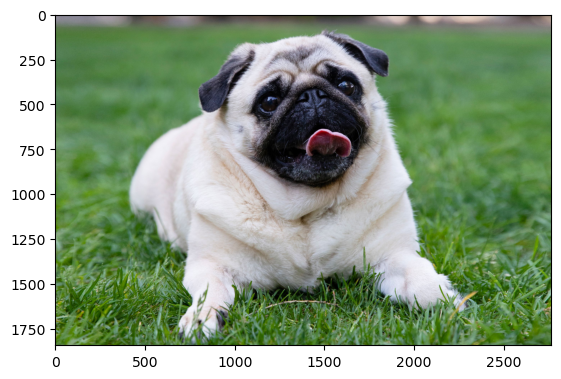

In [107]:
 import imageio
 import matplotlib.pyplot as plt

 pic = imageio.imread("/kaggle/input/photofile/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg")
 #plt.figure(figsize = (5,5))
 plt.imshow(pic)

In [108]:
type(pic)

imageio.core.util.Array

In [109]:
pic.shape


(1843, 2765, 3)

In [110]:
pic.shape[0],pic.shape[1],pic.shape[2]

(1843, 2765, 3)

In [111]:
print(f'Type of the image : {type(pic)}') 
print(f'Shape of the image : {pic.shape}') 
print(f'Image Height : {pic.shape[0]}') 
print(f'Image Width : {pic.shape[1]}') 
print(f'Dimension of Image {pic.ndim}')

Type of the image : <class 'imageio.core.util.Array'>
Shape of the image : (1843, 2765, 3)
Image Height : 1843
Image Width : 2765
Dimension of Image 3


In [112]:
1843*2765*3


15287685

In [113]:
print(f'Image size {pic.size}') 
print(f'Maximum RGB value in this image {pic.max()}') 
print(f'Minimum RGB value in this image {pic.min()}')

Image size 15287685
Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [114]:
pic.size


15287685

In [115]:
pic.max()


255

In [116]:
pic.min()

0

In [117]:
# A specific pixel located at Row : 100 ; Column : 50  
# Each channel's value of it, gradually R , G , B  
print(f'Value of only R channel {pic[100, 50, 0]}')
print(f'Value of only G channel {pic[100, 50, 1]}')
print(f'Value of only B channel {pic[ 100, 50, 2]}')

Value of only R channel 79
Value of only G channel 118
Value of only B channel 61


In [118]:
pic[ 100, 50, 2]

61

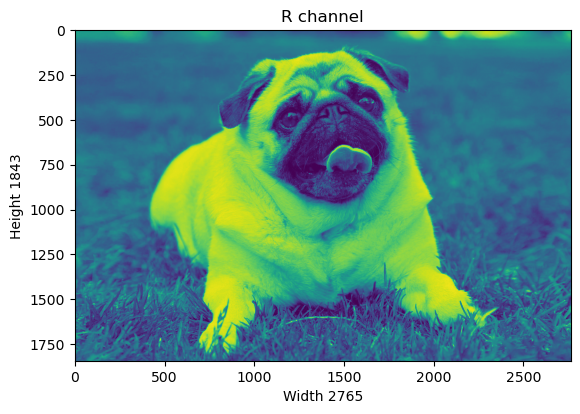

In [119]:
plt.title('R channel') 
plt.ylabel(f'Height {pic.shape[0]}') 
plt.xlabel(f'Width {pic.shape[1]}') 
plt.imshow(pic[ : , : , 0])
plt.show()
#Explore the color maps

In [120]:
pic[ : , : , 0]

Array([[142, 141, 141, ..., 160, 161, 161],
       [141, 141, 141, ..., 161, 162, 162],
       [141, 141, 142, ..., 161, 162, 164],
       ...,
       [ 87,  83,  79, ...,  53,  54,  55],
       [ 88,  85,  81, ...,  53,  54,  54],
       [ 89,  86,  84, ...,  53,  52,  52]], dtype=uint8)

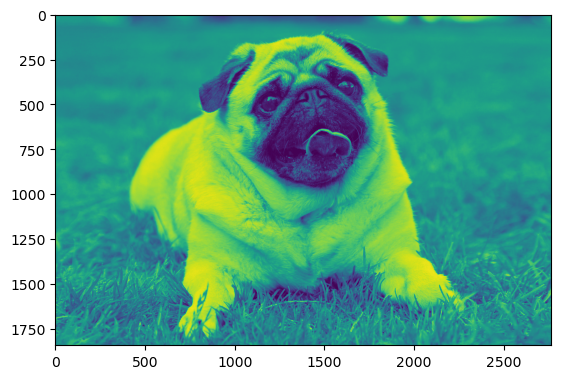

In [121]:
#Display the G channel
plt.imshow(pic[ : , : , 1])
plt.show()

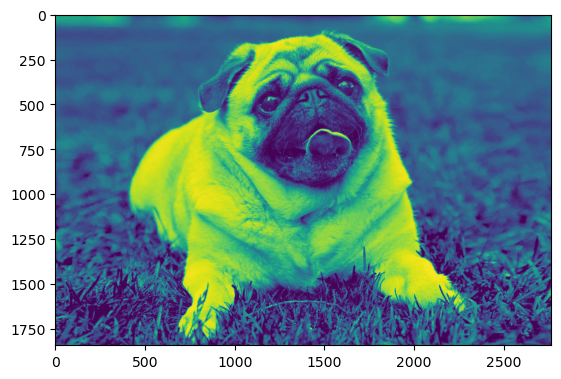

In [122]:
#Display the G channel
plt.imshow(pic[ : , : , 2])
plt.show()

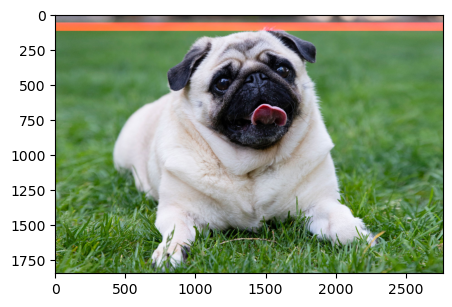

In [123]:
temppic = pic[::]
temppic[60:120 , : , 0] = 255 # full intensity to those pixel's R channel 
plt.figure( figsize = (5,5)) 
plt.imshow(temppic) 
plt.show()

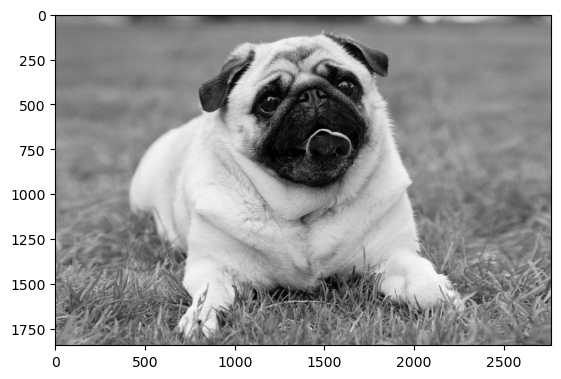

In [124]:
plt.imshow(pic[ : , : , 1], cmap="gray")
plt.show()

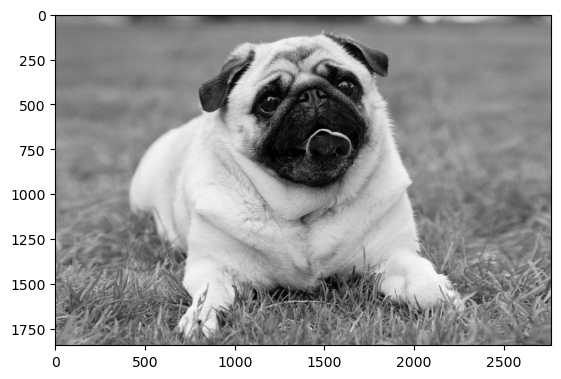

In [125]:
plt.imshow(pic[ : , : , 1], cmap="gray")
plt.show()

Splitting Layers
Now, we know that each pixel of the image is represented by three integers. Splitting the image into separate color components is just a matter of pulling out the correct slice of the image array.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  


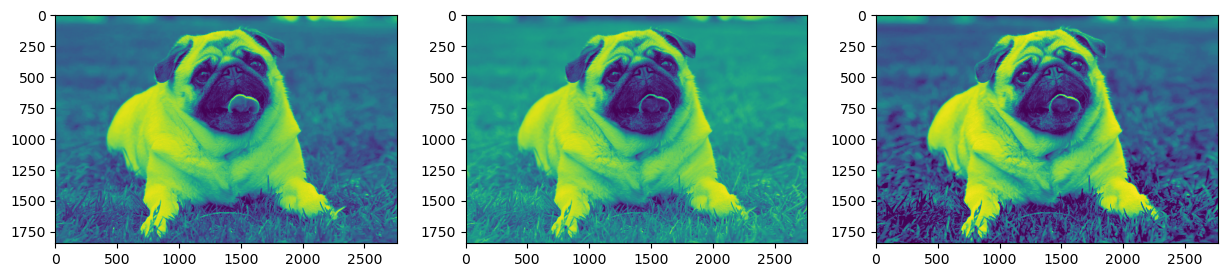

In [126]:
import numpy as np 
pic = imageio.imread('/kaggle/input/photofile/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg') 
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))  
for c, ax in zip(range(3), ax):     
     # create zero matrix        
     #split_img = np.zeros(pic.shape, dtype="uint8") 
     # 'dtype' by default: 'numpy.float64'  # assing each channel      
     #split_img[ :, :, c] = pic[ :, :, c] # display each channel     
     ax.imshow(pic[:, :, c])

In [127]:
'''GreyScaling
There are a couple of ways to do greyscaling in python to convert an image to grayscale, but a straightforward way of using matplotlib is to take the weighted mean of the RGB value of original image using this formula.

Y' = 0.299 R + 0.587 G + 0.114 B'''

"GreyScaling\nThere are a couple of ways to do greyscaling in python to convert an image to grayscale, but a straightforward way of using matplotlib is to take the weighted mean of the RGB value of original image using this formula.\n\nY' = 0.299 R + 0.587 G + 0.114 B"

In [128]:
pic[:,:, :3].shape

(1843, 2765, 3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """Entry point for launching an IPython kernel.


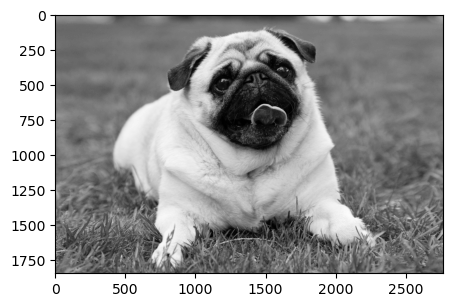

In [129]:
pic = imageio.imread('/kaggle/input/photofile/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg') 
gray = lambda rgb : np.dot(rgb , [0.299 , 0.587, 0.114])   
gray = gray(pic) 
plt.figure( figsize = (5,5))  
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray')) 
plt.show()

In [130]:
gray.shape

(1843, 2765)

***logical operators to process pixel values***

We can create a boolean ndarray in the same size by using a logical operator.

However, this won’t create any new arrays, but it simply returns True to its host variable.

For example, let’s consider we want to filter out some low-value pixels or high-value or (any condition) in an RGB image, and yes, it would be great to convert RGB to grayscale, but for now, we won’t go for that rather than deal with a color image.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """Entry point for launching an IPython kernel.


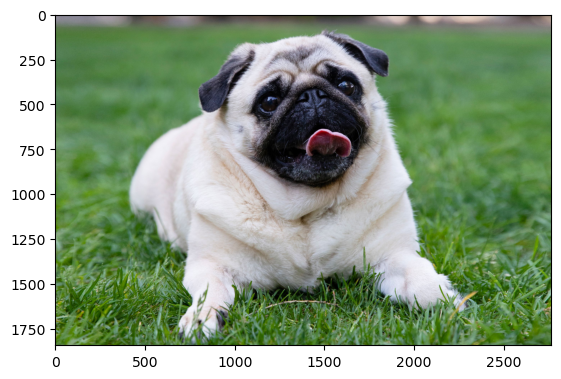

In [131]:
pic = imageio.imread('/kaggle/input/photofile/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg') 
#plt.figure(figsize=(5,5)) 
plt.imshow(pic) 
plt.show()

In [132]:
pic.shape

(1843, 2765, 3)

In [133]:
pic.size

15287685

In [134]:
x = np.array([4, 5, 6, 8])

In [135]:
x<5

array([ True, False, False, False])

In [136]:
low_pixel = pic > 200  
# to ensure of it let's check if all values in low_pixel are True or not 
if low_pixel.any() == True:     
    print(low_pixel.shape)
else:
  print("no value is less than the required one")

(1843, 2765, 3)


In [137]:
import random

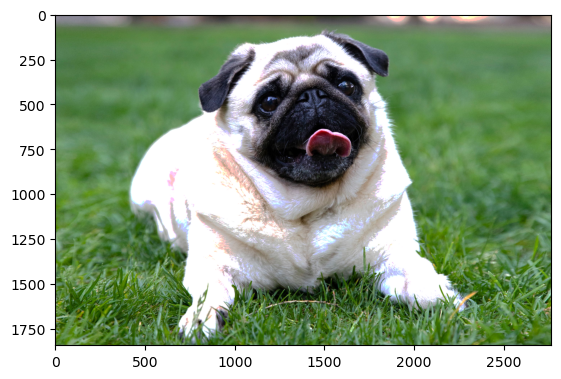

In [138]:
# set value randomly range from 25 to 225 - these value also randomly choosen
#pic[low_pixel] = random.randint(100,225)
pic[low_pixel] = 255
# display the image
#plt.figure( figsize = (5,5))
plt.imshow(pic)
plt.show()

***Masking***

In [139]:
# seperate the row and column values  
total_row , total_col , layers = pic.shape 

In [140]:
x , y = np.ogrid[:total_row , :total_col]  
# get the center values of the image 
cen_x , cen_y = total_row/2 , total_col/2  

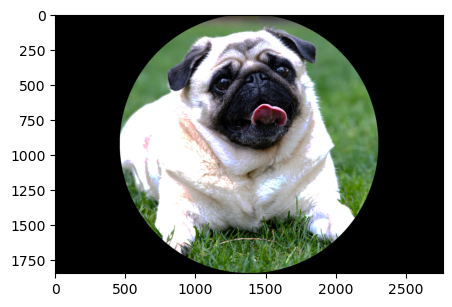

In [141]:
'''    
 Measure distance value from center to each border pixel.     To make it easy, we can think it's like, we draw a line from center-     to each edge pixel value --> s**2 = (Y-y)**2 + (X-x)**2  
''' 
distance_from_the_center = np.sqrt((x-cen_x)**2 + (y-cen_y)**2)  
# Select convenient radius value 
radius = (total_row/2)  
# Using logical operator '>'  
''' 
logical operator to do this task which will return as a value  of True for all the index according 
to the given condition 
''' 
circular_pic = distance_from_the_center > radius  
''' 
let assign value zero for all pixel value that outside the cirular disc. 
All the pixel value outside the circular disc, will be black now. 
''' 
pic[circular_pic] = 0 
plt.figure(figsize = (5,5)) 
plt.imshow(pic)  
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  from ipykernel import kern

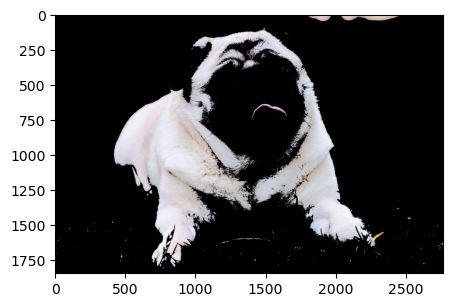

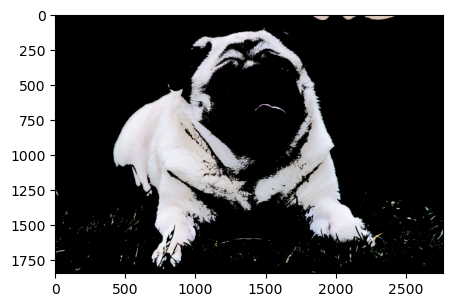

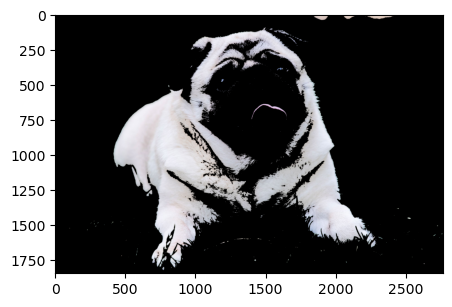

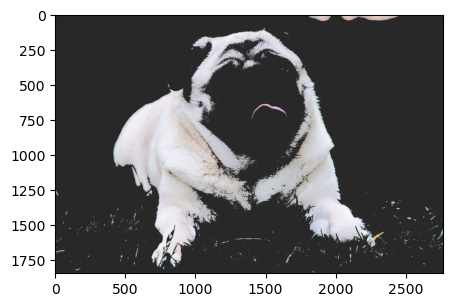

In [142]:
# Only Red Pixel value , higher than 180
pic = imageio.imread('/kaggle/input/photofile/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg')
red_mask = pic[:, :, 0] < 180
pic[red_mask] = 0
plt.figure(figsize=(5,5))
plt.imshow(pic)

# Only Green Pixel value , higher than 180
pic = imageio.imread('/kaggle/input/photofile/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg')
green_mask = pic[:, :, 1] < 180
pic[green_mask] = 0
plt.figure(figsize=(5,5))
plt.imshow(pic)
# Only Blue Pixel value , higher than 180
pic = imageio.imread('/kaggle/input/photofile/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg')
blue_mask = pic[:, :, 2] < 180
pic[blue_mask] = 0
plt.figure(figsize=(5,5))
plt.imshow(pic)
# Composite mask using logical_and
pic = imageio.imread('/kaggle/input/photofile/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg')
final_mask = np.logical_and(red_mask, green_mask, blue_mask)
pic[final_mask] = 40
plt.figure(figsize=(5,5))
plt.imshow(pic)

***mounting a google drive***

In [143]:
! conda install -y gdown

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Retrieving notices: ...working... done


In [144]:
import gdown

url = 'https://drive.google.com/drive/folders/1BpPZXGiGujVyUDlOzLNs1hzTRGO2h7F0'

output = 'file.npy'

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/drive/folders/1BpPZXGiGujVyUDlOzLNs1hzTRGO2h7F0
To: /kaggle/working/file.npy
1.03MB [00:00, 640MB/s]


'file.npy'

In [151]:
!gdown --id <put-the-ID> --folder

/bin/bash: put-the-ID: No such file or directory


In [156]:
!gdown --id 1_YdXDKBJhib_R6aHMi-SwUedzwkMLa_4 --folder 

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:130: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Retrieving folder list
Processing file 12k291sv0ea0H-PilyWNsc7ecZu_tWe_8 images (1).png
Processing file 1aWB7T8uM8Qzm2gOXjp0H16CYzTHPgp1B images (2).png
Processing file 1PYMKbVI0GvCH1wIQqQYxLkLC1b8O9Dg9 images (3).png
Processing file 1-4WZrw_qqr-vA5VEVXr2T30WYjewsYs9 images (4).png
Processing file 19irDIMdomitcZP4juxYCZSqVcodSbyuV images (5).png
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=12k291sv0ea0H-PilyWNsc7ecZu_tWe_8
To: /kaggle/working/images/images (1).png
100%|████████████████████████████████████████| 384k/384k [00:00<00:00, 80.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aWB7T8uM8Qzm2gOXjp0H16CYzTHPgp1B
To: /kaggle/working/images/image

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """Entry point for launching an IPython kernel.


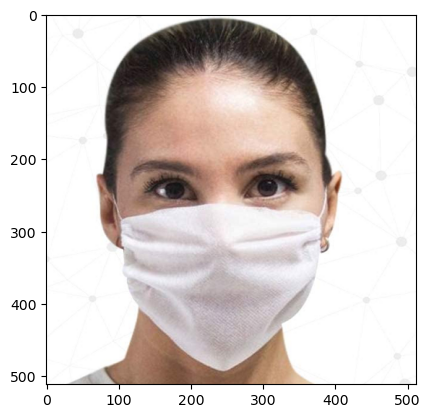

In [189]:
pic = imageio.imread("/kaggle/working/images/images (1).png")
plt.imshow(pic)

In [190]:
# importing libraries
import tensorflow 
import keras  
import os
import glob 
from skimage import io 
import random 
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
# Importing and Loading the data into a data frame

dataset_path = '/content/drive/MyDrive/GUVI dw35/Animals' 
class_names = ['Cheetah', 'Jaguar', 'Leopard', 'Lion','Tiger']

# apply glob module to retrieve files/pathnames  

animal_path = os.path.join(dataset_path, class_names[1], '*')
animal_path = glob.glob(animal_path)
#print(animal_path)

In [197]:
animal_path

[]

In [ ]:
# accessing an image file from the dataset classes
image = io.imread(animal_path[6])  

# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

Image Data preprocessing
Since images exist in different formats, i.e., natural, fake, grayscale, etc., we need to take into consideration and standardize them before feeding them into a neural network.

In [ ]:
#Explore RGB channels of the image

# plotting the original image and the RGB channels  

i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(image)  #Original image
im2.imshow(image[:, : , 0]) #Red
im3.imshow(image[:, : , 1]) #Green
im4.imshow(image[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

In [ ]:
Grayscale conversion
Grayscale is simply converting images from colored to black and white. It is normally used to reduce computation complexity in machine learning algorithms.

Since most pictures don’t need color to be recognized, it is wise to use grayscale, which reduces the number of pixels in an image, thus, reducing the computations required.

Execute the code below to convert the original image to grayscale:

In [ ]:
import skimage
gray_image = skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

Converting images to grayscale might not always be practical in solving some problems. A few examples where it would be impractical to use grayscale include: traffic lights, healthcare diagnosis, autonomous vehicles, agriculture, etc. The best way to know whether to use it or not depends on your human visual ability to identify an object without color.

Normalization
Also referred to as data re-scaling, it is the process of projecting image data pixels (intensity) to a predefined range (usually (0,1) or (-1, 1)). This is commonly used on different data formats, and you want to normalize all of them to apply the same algorithms over them.

Normalization is usually applied to convert an image’s pixel values to a typical or more familiar sense.

In [ ]:
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)